In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
df = pd.read_csv("car.data", header=None)
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = df.rename(columns=dict(zip(df.columns, header)))
le = LabelEncoder()
print(df.head())

  buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc


In [5]:
df.isnull().sum()


buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='buying'>

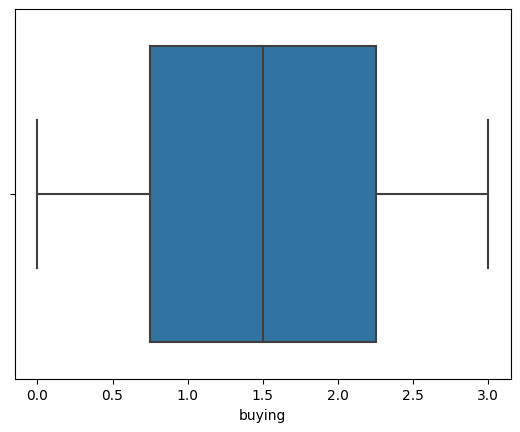

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
sns.boxplot(x=df["buying"])

In [8]:
print("Buying - Mean:", df["buying"].mean(), " Median:", df["buying"].median(), " Variance:", df["buying"].var(), " Standard Deviation:", df["buying"].std())
print("Maintenance - Mean:", df["maint"].mean(), " Median:", df["maint"].median(), " Variance:", df["maint"].var(), " Standard Deviation:", df["maint"].std())


Buying - Mean: 1.5  Median: 1.5  Variance: 1.2507237984944992  Standard Deviation: 1.1183576344329658
Maintenance - Mean: 1.5  Median: 1.5  Variance: 1.2507237984944992  Standard Deviation: 1.1183576344329658


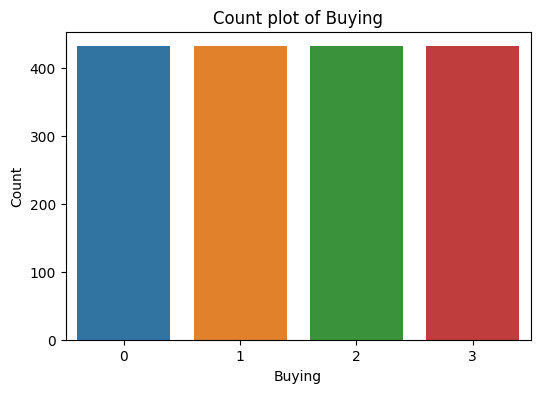

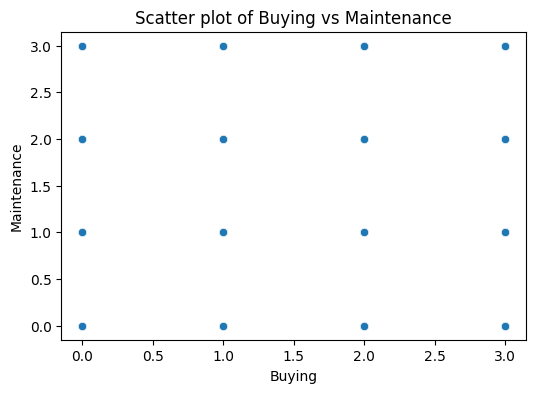

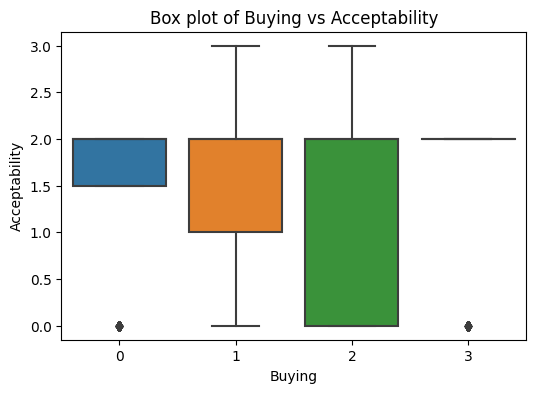

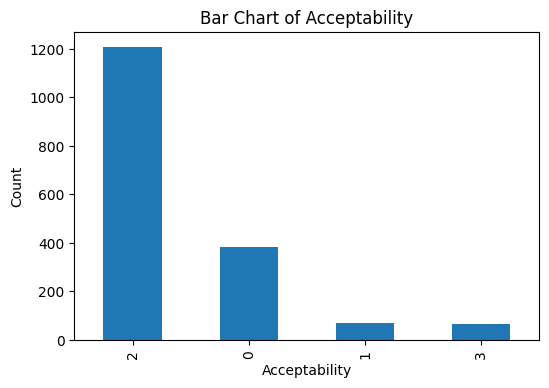

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x="buying", data=df)
plt.title("Count plot of Buying")
plt.xlabel("Buying")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="buying", y="maint", data=df)
plt.title("Scatter plot of Buying vs Maintenance")
plt.xlabel("Buying")
plt.ylabel("Maintenance")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="buying", y="acceptability", data=df)
plt.title("Box plot of Buying vs Acceptability")
plt.xlabel("Buying")
plt.ylabel("Acceptability")
plt.show()

plt.figure(figsize=(6, 4))
df["acceptability"].value_counts().plot(kind='bar')
plt.title("Bar Chart of Acceptability")
plt.xlabel("Acceptability")
plt.ylabel("Count")
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [11]:
X = df_encoded.drop('acceptability', axis=1)
y = df_encoded['acceptability']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)


In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
